a) Primero, generamos 100 valores aleatorios que sigan una distribución binomial con $n=10$ y $p=0.4$

In [169]:
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt

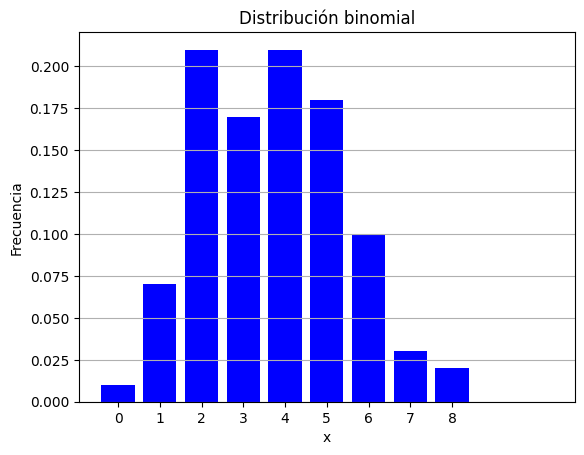

In [170]:
n, p, t = 10, 0.4, 100 # n = número de ensayos, p = probabilidad de éxito, t = tamaño de la muestra.
datos = np.random.binomial(n, p, t)

m, incompleto = np.unique(datos, return_counts=True)

v = np.zeros(n+1)

v[m] = incompleto

frec = v/t

escala = np.arange(n+1)

plt.bar(escala, frec, color='blue')
plt.xticks(m)
plt.xlabel('x')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.title('Distribución binomial')
plt.show()

b) Luego, sabemos que $\chi ^2 = \sum_{i=1}^n \frac{(x_{i}-x_{teo})^2}{x_{teo}}$ por lo tanto generamos valores de una distribución teórica con los mismos parámetros para así estimar $\chi ^2$

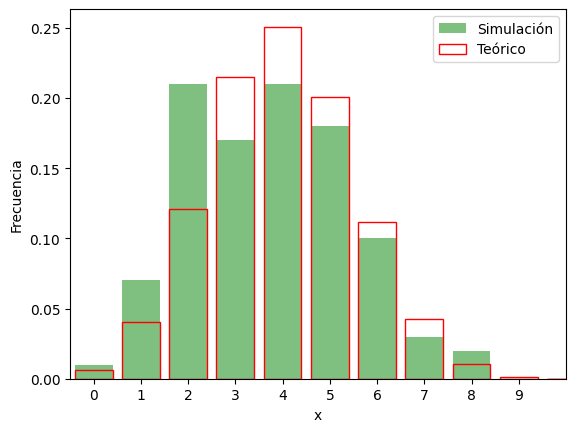

χ² = 12.304845129448921


In [171]:
x = np.arange(n+1)
teo = sp.binom.pmf(x, n, p)
plt.bar(escala,frec, color='green', alpha=0.5, label='Simulación')
plt.bar(x, teo, facecolor='none', edgecolor='red', label='Teórico')
plt.xlabel('x')
plt.ylabel('Frecuencia')
plt.legend()
plt.xticks(x-1)
plt.xlim(-0.5,10)
plt.show()

#Luego, calculamos el estadístico:
a=teo*t #Frecuencia absoluta teórica, pues sp.binom.pmf me devuelve relativas.

chi = 0
for i in range(len(v)):
    chi += ((v[i] - a[i])**2) / a[i]

print('χ² =', chi)

In [172]:
print(sp.chi2.ppf(1-0.05, n-1))

16.918977604620448


c) Ahora, realizamos una prueba de hipótesis nula para saber si mis datos están acorde al modelo:

$H_{0}$: La simulación sigue la distribución teórica

$H_{1}$: La simulación no sigue la distribución teórica.

Usamos un $\alpha = 0.01$ y tenemos 9 grados de libertad (1 menos que el número de ensayos). Por lo tanto $\chi_{1-\alpha , 9}^2=16.91898$

Recordemos que la zona de aceptación de $H_{0}$ es $\chi^2 <  \chi_{1-\alpha , 9}^2$ mientras que la región de rechazo es  $\chi^2 >  \chi_{1-\alpha , 9}^2$ por lo que en este caso, la hipótesis nula es correcta.

d) El Valor-p de la prueba es $p=\int_{\chi_{ref}}^\infty \chi^2(x)dx$ el cual lo podemos calcular con scipy:

In [173]:
p = sp.chi2.sf(chi, n)
print(p)

0.26517230660063545


Finalmente, podemos contrastar nuestros resultados con la tarea sp.chisquare(observado,teórico) y comprobamos que los resultados son correctos:

In [174]:
chifacil, pfacil = sp.chisquare(v, a)
print('El valor de χ² es', chifacil, 'y el p-valor es', pfacil)

El valor de χ² es 12.304845129448921 y el p-valor es 0.26517230660063545


Ahora, generaremos 100 gaussianas con $\mu \in [2,7]$ y estudiaremos su p en relación a la binomial. 

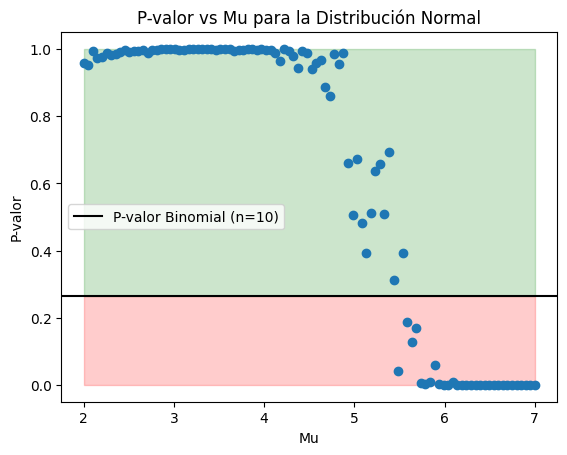

In [175]:
mu = np.linspace(2,7,100)
chig=[]
pg=[]

for i in range(100):
    gauss = np.random.normal(loc=mu[i], scale=2.5, size=1000)
    gauss_discreto = np.histogram(gauss, bins=11, range=(-0.5,10.5))
    gauss_discreto=np.array(gauss_discreto[0]/np.sum(gauss_discreto[0]))
    l, k = sp.chisquare(gauss_discreto, teo)
    chig.append(l)
    pg.append(k)

plt.show()

plt.plot(mu,pg,'o')
plt.xlabel('Mu')
plt.ylabel('P-valor')
plt.axhline(pfacil, color='black', label='P-valor Binomial (n=10)')

plt.fill_between(mu, 0, pfacil, color='red', alpha=0.2)
plt.fill_between(mu, pfacil, 1, color='green', alpha=0.2)
plt.title('P-valor vs Mu para la Distribución Normal')
plt.legend()
plt.show()


Donde observamos que las Gaussianas cuyo $p(\mu)$ cae en la zona verde son indistinguibles de la binomial.